In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For creating statistical visualizations

# Read the CSV file into a pandas DataFrame
uber_data = pd.read_csv('UberDataset.csv')  # Load the dataset from the provided file

# Convert the 'START_DATE' column to datetime format
# The 'errors="coerce"' argument will replace invalid parsing with NaT (Not a Time)
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')

# Convert the 'END_DATE' column to datetime format
# This ensures consistency in date-time processing for further analysis
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')


In [2]:
# Display the first 5 rows of the dataset to get an overview of its structure and content
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
# Display a concise summary of the dataset, including the number of non-null values and data types of each column
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [4]:
# Calculate the duration of each trip in minutes
uber_data['DURATION'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60

# Print dataset overview
print("Dataset Overview:")

# Display total number of trips in the dataset
print("Total Trips:", len(uber_data))

# Display the date range from the earliest to the latest trip
print("Date Range:", uber_data['START_DATE'].min(), "to", uber_data['END_DATE'].max())

# Print numerical statistics for the relevant columns (MILES and DURATION)
print("\nNumerical Statistics:")
print(uber_data[['MILES', 'DURATION']].describe())


Dataset Overview:
Total Trips: 1156
Date Range: 2016-01-01 21:11:00 to 2016-12-12 20:57:00

Numerical Statistics:
              MILES    DURATION
count   1156.000000  420.000000
mean      21.115398   19.326190
std      359.299007   19.155582
min        0.500000    0.000000
25%        2.900000    9.000000
50%        6.000000   15.000000
75%       10.400000   22.250000
max    12204.700000  178.000000


In [5]:
#Summary statistics for numerical columns
numerical_summary = uber_data.describe()
numerical_summary

,START_DATE,END_DATE,MILES,DURATION
count,421,420,1156.000000,420.000000
mean,2016-07-01 12:31:09.976247040,2016-07-01 12:11:10.142857216,21.115398,19.326190
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,0.000000
25%,2016-04-01 13:43:00,2016-03-27 15:10:00,2.900000,9.000000
50%,2016-07-04 18:23:00,2016-07-04 18:19:00,6.000000,15.000000
75%,2016-10-10 17:22:00,2016-10-10 17:39:15,10.400000,22.250000
max,2016-12-12 20:48:00,2016-12-12 20:57:00,12204.700000,178.000000
std,NaN,NaN,359.299007,19.155582


In [6]:
#Check for missing values in the dataset
missing_values = uber_data.isnull().sum()
missing_values

START_DATE    735
END_DATE      736
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
DURATION      736
dtype: int64

In [7]:
#Categorical analysis (unique counts and value counts for categorical columns)
category_counts = uber_data['CATEGORY'].value_counts()
purpose_counts = uber_data['PURPOSE'].value_counts()
category_counts, purpose_counts

(CATEGORY
 Business    1078
 Personal      77
 Name: count, dtype: int64,
 PURPOSE
 Meeting            187
 Meal/Entertain     160
 Errand/Supplies    128
 Customer Visit     101
 Temporary Site      50
 Between Offices     18
 Moving               4
 Airport/Travel       3
 Charity ($)          1
 Commute              1
 Name: count, dtype: int64)

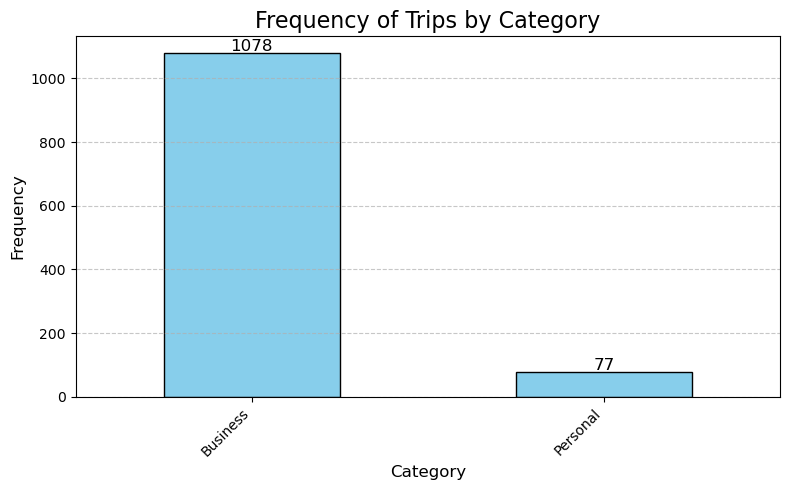

In [8]:
# Create a bar plot to visualize the frequency of each category
plt.figure(figsize=(8, 5))  # Set the figure size for better readability
ax = category_counts.plot(kind='bar', color='skyblue', edgecolor='black')  # Custom colors and edges for the bars

# Add a title and labels for the axes
plt.title('Frequency of Trips by Category', fontsize=16)  # Title with larger font
plt.xlabel('Category', fontsize=12)  # Label for x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for y-axis

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()

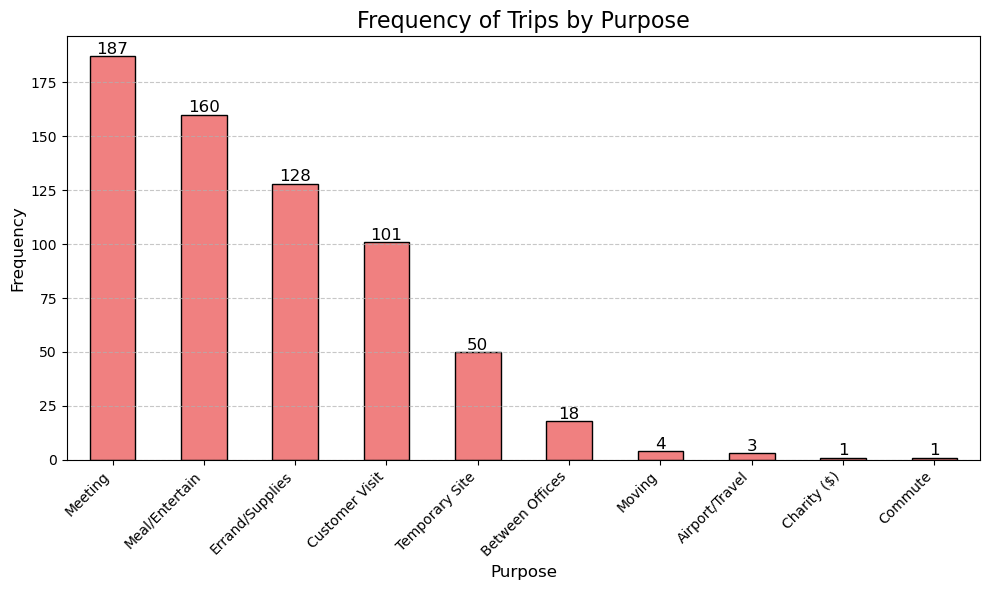

In [9]:
# Create a bar plot to visualize the frequency of each purpose
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
ax = purpose_counts.plot(kind='bar', color='lightcoral', edgecolor='black')  # Custom colors and edges for the bars

# Add a title and labels for the axes
plt.title('Frequency of Trips by Purpose', fontsize=16)  # Title with larger font
plt.xlabel('Purpose', fontsize=12)  # Label for x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for y-axis

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()
